In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
#smote - synthetic minority oversampling technique
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [3]:
#data Loading and Understanding

df = pd.read_csv("train.csv")
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [4]:
#Initial Inspection

df.shape

(800, 22)

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
#displaying all the columns in the dataframe

pd.set_option('display.max_columns', None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
#converting age column from float into integer

df["age"] = df["age"].astype(int)

In [10]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [11]:
df["result"].min()

-6.137748048

In [12]:
df["result"].max()

15.85312603

In [13]:
#Finding out unique features

for col in df.columns:
    #print(col)
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

There is '?' is some of the data, which is missing values basically. We should be working on it.

In [14]:
#Dropping ID and age_desc column

df = df.drop(columns=["ID", "age_desc"])

In [15]:
df.shape

(800, 20)

In [16]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [17]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [18]:
#define the mapping dictionary for country names

mapping = {
    "Viet Nam" : "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

#replace the values with contry column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)


In [19]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [20]:
#target class distribution

df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


# Insights
### missing values in ethnicity and relatino
### age_desc column has only 1 unique values, so removed it
### fixed countrynames
### Identified class imbalance in target column


In [21]:
#EDA

df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [22]:
df.rename(columns={'contry_of_res': 'country_of_res'}, inplace=True)

In [23]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [24]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


#Univariate analysis

#Numerical Columns: age and result

In [25]:
#theme

sns.set_theme(style="darkgrid")

Mean:  27.96375
Median:  24.0


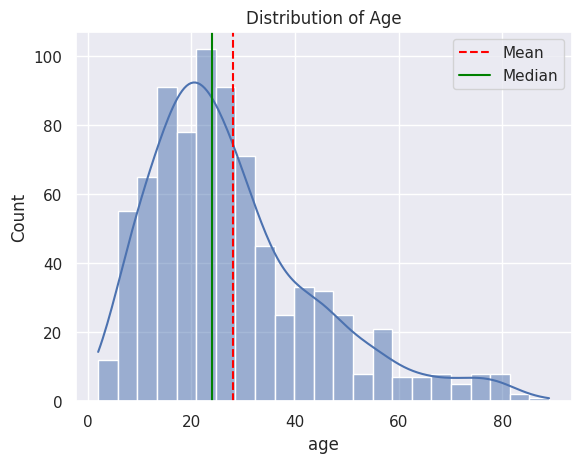

In [26]:
#Distribution plots
#Histograms for Age

sns.histplot(df["age"], kde=True) #kde-kernel density estimation
plt.title("Distribution of Age")

#calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean: ", age_mean)
print("Median: ", age_median)

#adding vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")
plt.legend()

plt.show()

It is right skewed

Mean:  8.537303106501248
Median:  9.605299308


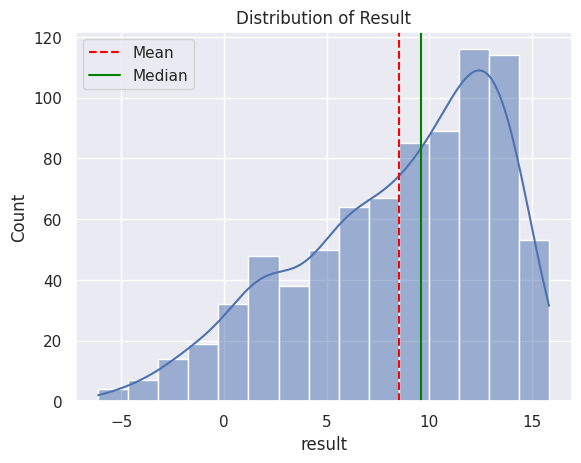

In [27]:
#Distribution plots
#Histograms for Results

sns.histplot(df["result"], kde=True) #kde-kernel density estimation
plt.title("Distribution of Result")

#calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean: ", result_mean)
print("Median: ", result_median)

#adding vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")
plt.legend()

plt.show()

It is left skewed

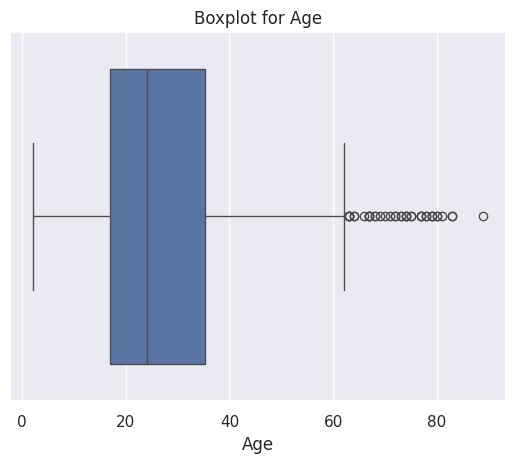

In [28]:
#Box plots for identifying the outliers in the numerical columns
#Box plot for age column

sns.boxplot(x = df["age"])
plt.title("Boxplot for Age")
plt.xlabel("Age")
plt.show()

There are several outliers present in the data, especially after 63 years.

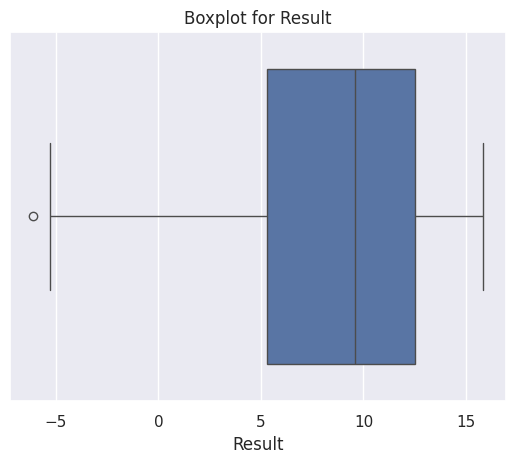

In [29]:
#Box plots for identifying the outliers in the numerical columns
#Box plot for result column

sns.boxplot(x = df["result"])
plt.title("Boxplot for Result")
plt.xlabel("Result")
plt.show()

In [30]:
#Count the outliers using IQR method

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [31]:
len(age_outliers)

39

In [32]:
#Count the outliers using IQR method

Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [33]:
len(result_outliers)

1

Univariate analysis of Categorical Features

In [34]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [35]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
                       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before', 'relation']


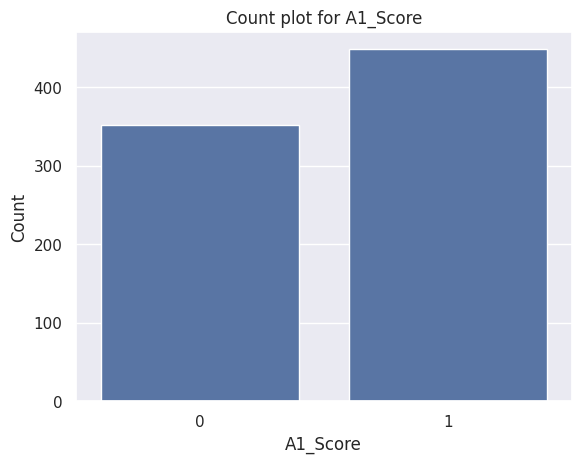

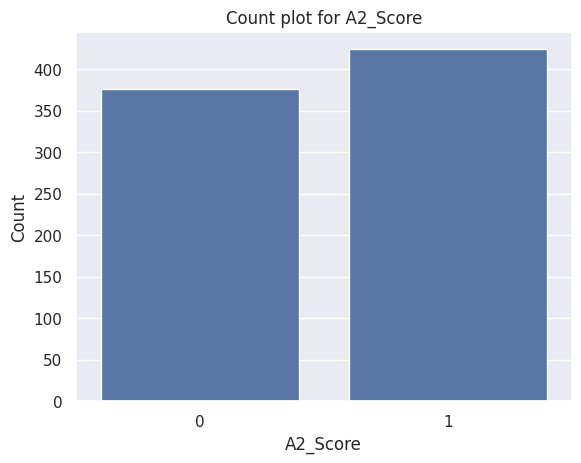

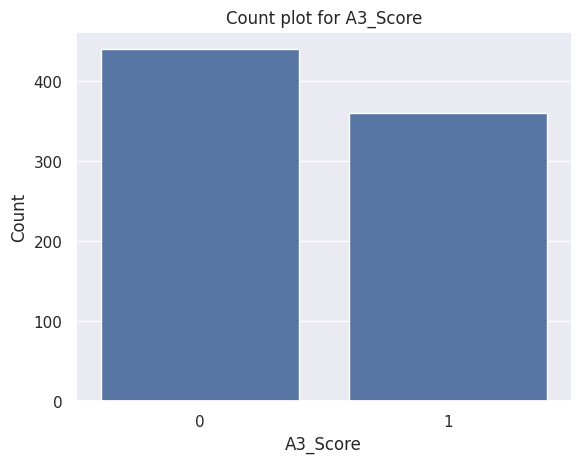

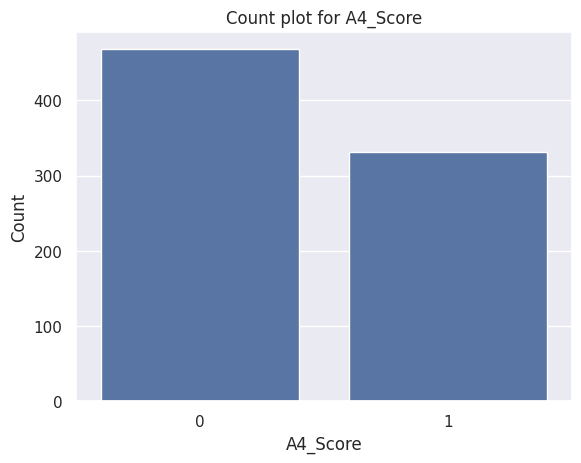

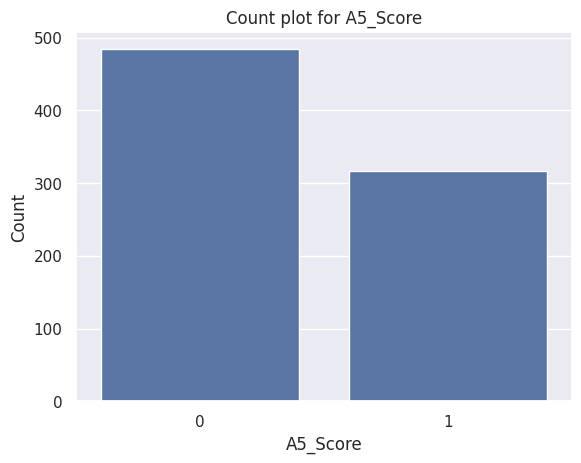

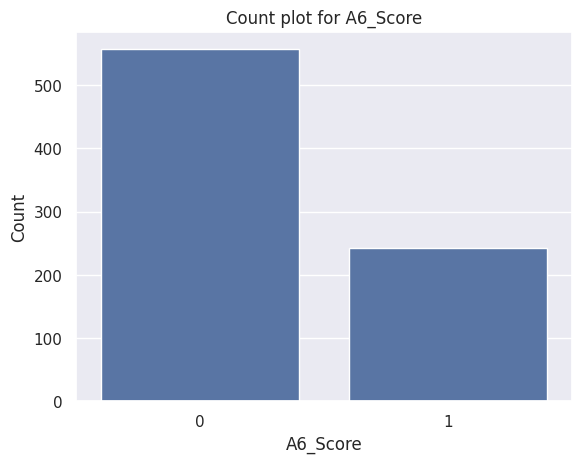

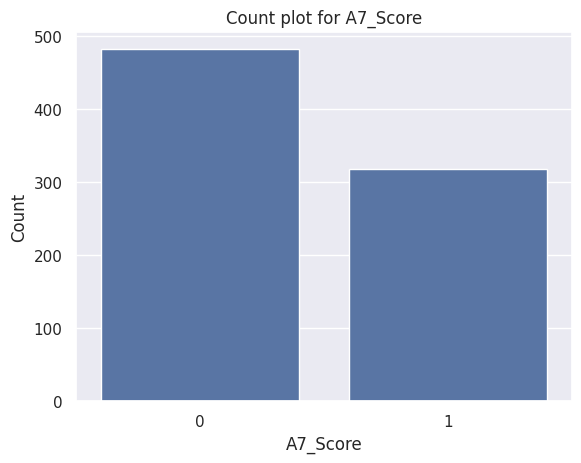

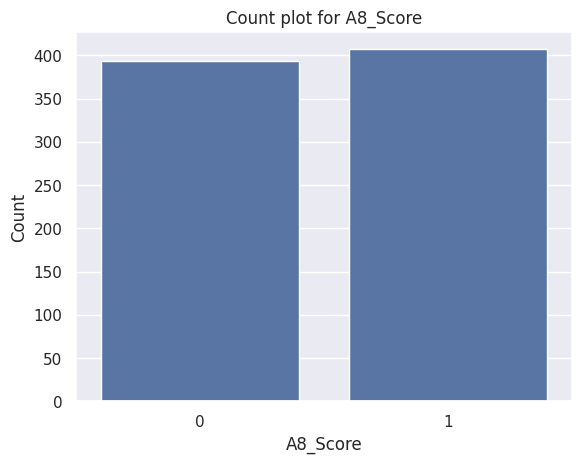

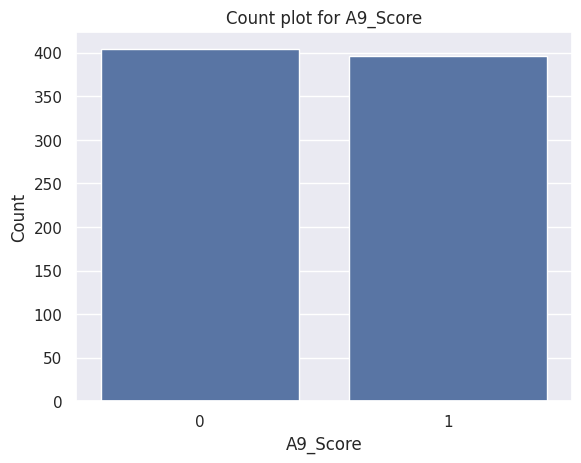

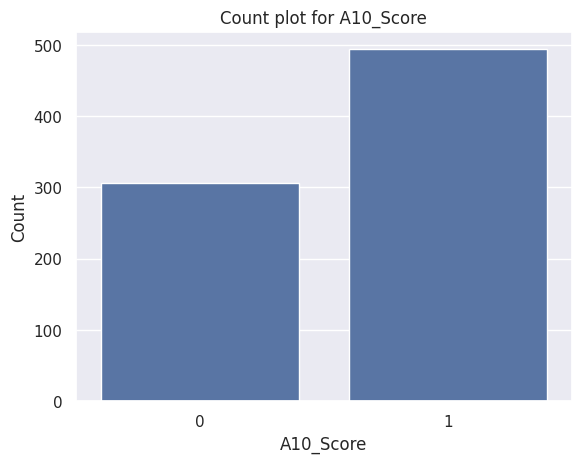

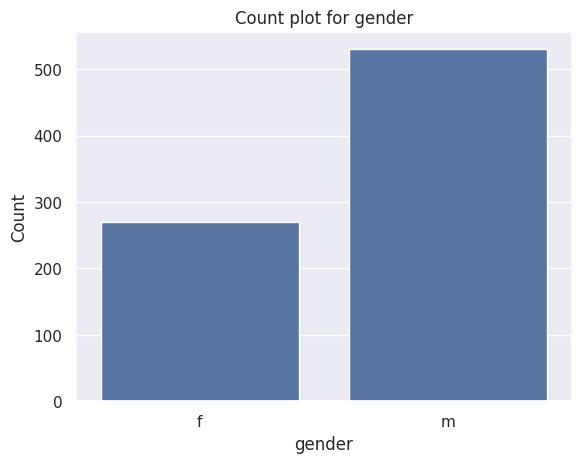

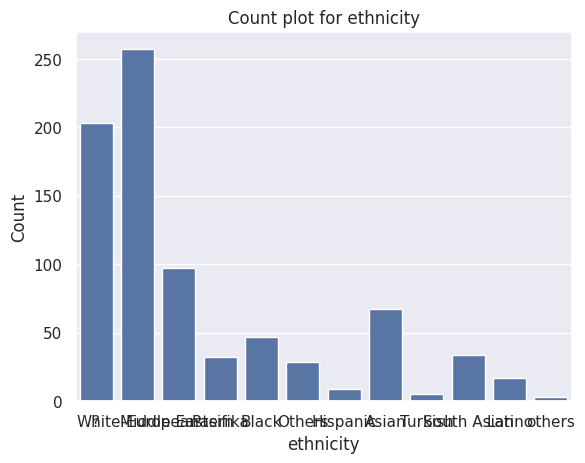

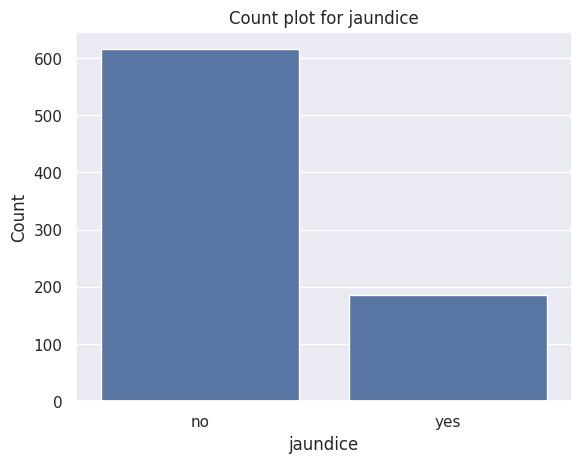

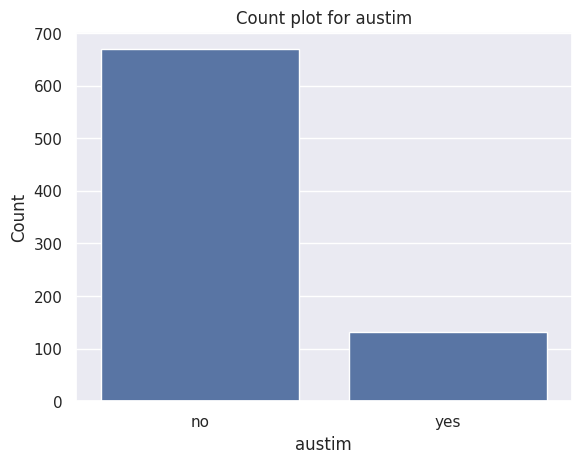

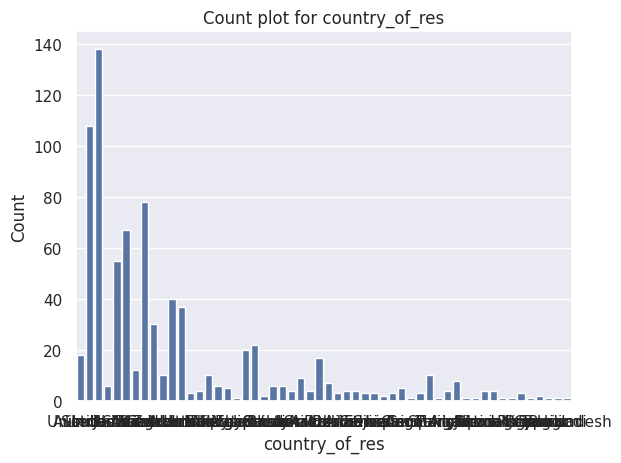

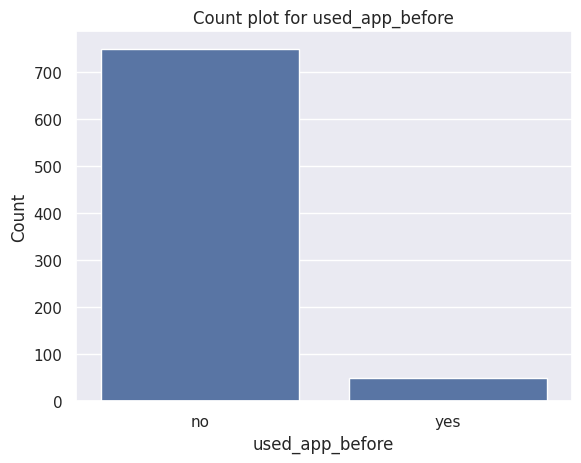

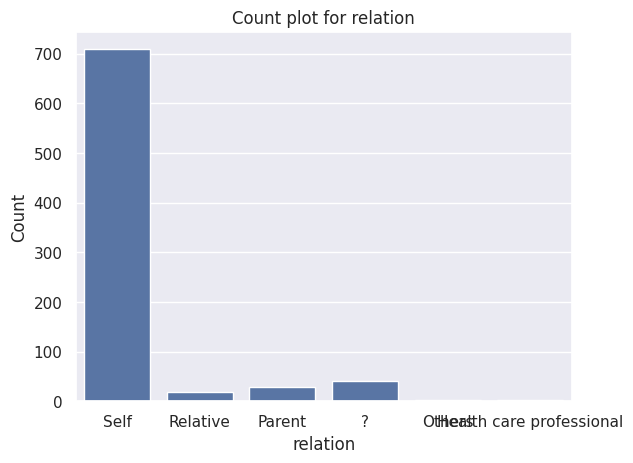

In [36]:
for col in categorical_columns:
    sns.countplot(x = df[col])
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [37]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


# Handling the missing values(?) present in the data

# Ethnicity and Relation columns

--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']

In ethnicity, there are two others(one lower case and other with upper case) and there is ? missing value.



relation ['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']

Similarly for relation, we'll have only 2 categories one is self, remaining as others.

In [38]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [39]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [40]:
df["relation"] = df["relation"].replace(
    {"Relative": "Others",
     "Parent": "Others",
     "?": "Others",
     "Health care professional": "Others"}
)

In [41]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

#Label Encoding

#identify columns with object data type

In [42]:
object_columns = df.select_dtypes(include = ["object"]).columns

In [43]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [44]:
#Initialize the dictionary to store the encoders
encoders = {}

In [45]:
#Apply labelling and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder          #saving the encoder for this column

In [46]:
#save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [47]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [48]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate Analysis

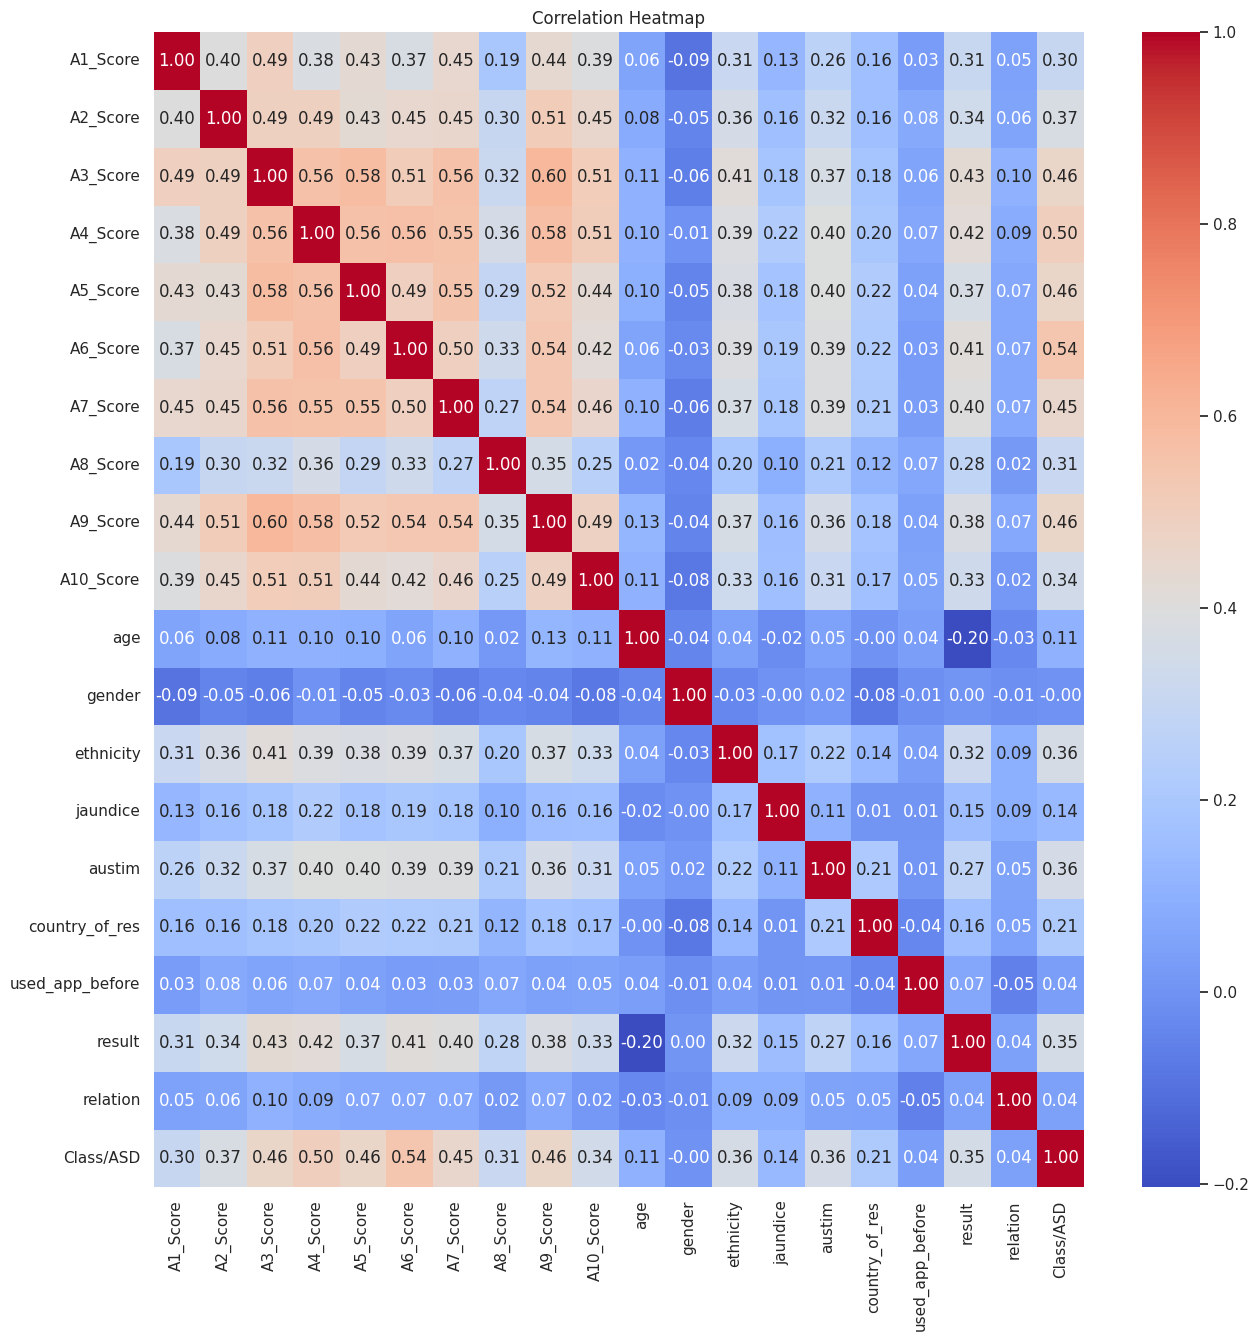

In [49]:
#correlation heatmap

plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


**Insights from EDA

- There are a few outliers in the numerical column(age, result).
- There is a class imbalance in target column
- There is a class imbalance in categorical columns.
- We don't have highly correlated columns
- Performed the label encoders and saved.

In [50]:
#Data Processing

#handling the outliers

#Function to replace the outliers with median

In [51]:
def replace_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  #replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return df

  #we are using lambda function to say that, when the x-value(individual values/ row values of the column)
  #So, if x is less than lower bound then it is an outlier. Similarly, if x is more than upper bound it is also an outlier.
  #whenever such condition happens, replace the x value with the median, else leave it as x only.

In [52]:
#replace outliers in age column

df = replace_outliers(df, "age")

In [53]:
#replace outliers in result column

df = replace_outliers(df, "result")

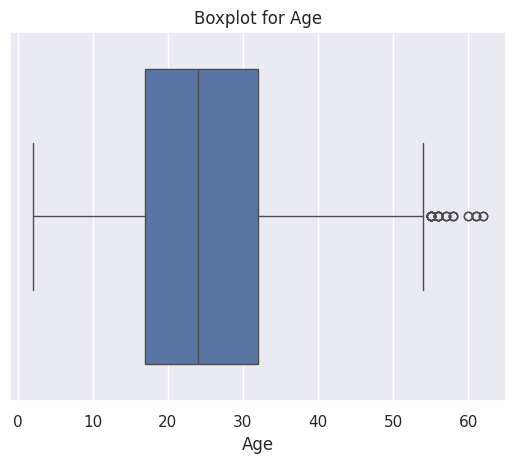

In [54]:
#Box plot for age column
#Checking again for outliers, if worked or not

sns.boxplot(x = df["age"])
plt.title("Boxplot for Age")
plt.xlabel("Age")
plt.show()

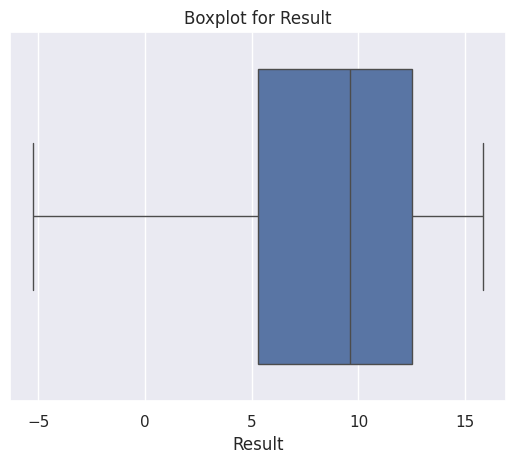

In [55]:
#Box plot for result column
#Checking again for outliers, if worked or not

sns.boxplot(x = df["result"])
plt.title("Boxplot for Result")
plt.xlabel("Result")
plt.show()

Train Test Split


In [56]:
X = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]

In [57]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [58]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [61]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [62]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE - Synthetic Minority Oversampling Technique

In [63]:
smote = SMOTE(random_state=42)

In [64]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [65]:
print(y_train_smote.shape)

(1030,)


In [66]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [67]:
#SMOTE is basically used to provide class imbalance, in our case we had, 515 and 125 as value counts initially.
#Using smote, we now have 515 and 515 as value counts, so it provides a class balance.

**Model Training**

In [68]:
#Dict of classifiers

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [69]:
#dictionary to store the cross validation results
cv_scores ={}

#perform 5-fold cross vaildaiton for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accirauct: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accirauct: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accirauct: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accirauct: 0.90
--------------------------------------------------


In [70]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [71]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

Model Selection and Hyperparamter Tuning

In [72]:
# Initialzing models
decision_tree =  DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [73]:
#hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

param_grid_rf = {
    "n_estimators": [50,100,200,500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50,100,200,500],
    "max_depth": [3,5,7,10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [74]:
#Hyperparameter Tuning for 3 models

#The below steps can be automated by using for loop or by using a pipeline.

#Perform RandomvisedSearchCV for each model

random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)



In [75]:
#fit the models

random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [76]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
0.8699029126213592


In [77]:
print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
0.9271844660194175


In [78]:
print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.9116504854368932


In [79]:
#Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_


if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_


if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_

In [80]:
print(f"Best Model is : {best_model}")
print(f"Best Cross-Validation Accuracy is : {best_score:.2f}")

Best Model is : RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy is : 0.93


In [81]:
#save the best model

with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [83]:
#evaluate the test data

y_test_pred = best_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Classification Report: \n", classification_report(y_test, y_test_pred))

Accuracy Score:  0.81875
Confusion Matrix: 
 [[108  16]
 [ 13  23]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

